## Importing Modules

In [1]:
# Importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Preprocessing methods
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

## Input Data

In [2]:
# Input the data set
dfData = pd.read_csv("50_Startups.csv")
dfData.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


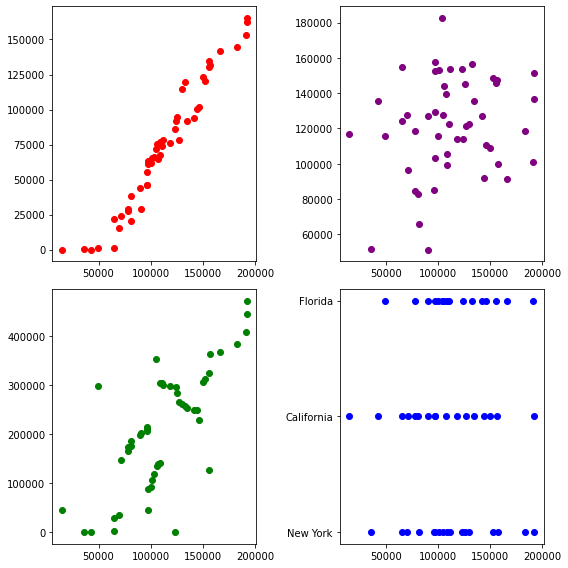

In [3]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(8, 8))
fig.figsize = (10, 10)
ax[0, 0].scatter(dfData['Profit'], dfData['R&D Spend'],color = 'red')
ax[0, 1].scatter(dfData['Profit'], dfData['Administration'],color = 'purple')
ax[1, 0].scatter(dfData['Profit'], dfData['Marketing Spend'], color ='green')
ax[1, 1].scatter(dfData['Profit'], dfData['State'],color = 'blue')
plt.tight_layout()

## Define features and labels

In [4]:
# Define features and labels
x = dfData.iloc[:,:-1].values
y = dfData.iloc[:,-1].values

## Converting text into columns

In [5]:
# Convert text data to numbers

ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [3])], remainder='passthrough')
x = np.array(ct.fit_transform(x))


## Scaling Dataset

In [6]:
# Scale the dataset
sc = StandardScaler()
x = sc.fit_transform(x)


## Separating training and testing data

In [7]:
# Separate the dataset into training and testing## Define features and labels
Xtrain, Xtest, Ytrain, Ytest = train_test_split( x, y, test_size = 0.3,random_state=42)


## Implementing the logic for cost function and gradient descent function

In [8]:
# Creating the cost and gradient function
#calculate cost
def CostFunction(x,y,w,b):
    cost = np.sum((((x.dot(w) + b) - y) ** 2) / (2*len(y)))
    return cost

In [9]:
#Gradient Descent
def GradientDescent(x, y, w, b, learning_rate, epochs):
    cost_list = [0] * epochs
   
    for epoch in range(epochs):
        z = x.dot(w) + b
        loss = z - y
        
        weight_gradient = x.T.dot(loss) / len(y)
        bias_gradient = np.sum(loss) / len(y)
        
        w = w - learning_rate*weight_gradient
        b = b - learning_rate*bias_gradient
  
        cost = CostFunction(x, y, w, b)
        cost_list[epoch] = cost
        
        if (epoch%(epochs/10)==0):
            print("Cost at epoch",epoch,"is:",cost)
        
    return w, b, cost_list

## Calculating weights and bias

In [16]:
# Calculating weights and bias
w, b, c= GradientDescent(Xtrain, Ytrain, np.zeros(Xtrain.shape[1]), 0, 0.002,epochs=10000)


Cost at epoch 0 is: 6989316078.6237135
Cost at epoch 1000 is: 200512882.6862143
Cost at epoch 2000 is: 68805062.98158678
Cost at epoch 3000 is: 52213406.46017958
Cost at epoch 4000 is: 45742364.741230436
Cost at epoch 5000 is: 42939191.499435574
Cost at epoch 6000 is: 41718884.2933599
Cost at epoch 7000 is: 41187527.00615271
Cost at epoch 8000 is: 40956156.0778435
Cost at epoch 9000 is: 40855409.29807189


## Plotting the cost function

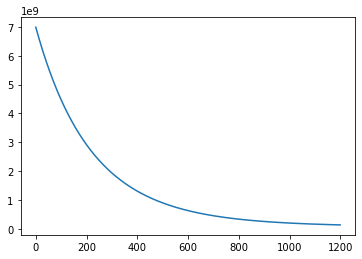

In [11]:
# Plotting the cost
plt.plot(c)

## Predicting values

In [12]:
# Predicting labels with the calculated weights and biases
def predict(X, w, b):
    return X.dot(w) + b

In [13]:
y_pred = predict(Xtest, w, b)

## Calculating accuracy

In [14]:
# Calculating the r² accuracy of our model
def r2score(y_pred, y):
    rss = np.sum((y_pred - y) ** 2)
    tss = np.sum((y-y.mean()) ** 2)
    
    r2 = 1 - (rss / tss)
    return r2

In [15]:
r2score(y_pred, Ytest)

0.6317721398592246